In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip

In [2]:
data = pd.read_csv("rantoul_pol_bsa_20221212.csv",delimiter=";",skiprows=14)

In [3]:
v_data = np.array([d for d in data['Power (W).3']])
h_data = np.array([d for d in data['Power (W).1']])
#float(data['Power (W).2'][0])

In [4]:
ratio_hv = v_data/h_data

In [5]:
a_data = np.array([d for d in data['Power (W).2']])
d_data = np.array([d for d in data['Power (W)']])

In [6]:
ratio_da = a_data/d_data

In [8]:
times = [datetime.datetime.strptime(data['Date (MM/dd/yyyy) '][i][1:]+d,'%m/%d/%Y %H:%M:%S') for i,d in enumerate(data['Time of day (hh:mm:ss) '])]

Text(0.5, 1.0, '4th floor Rantoul loop')

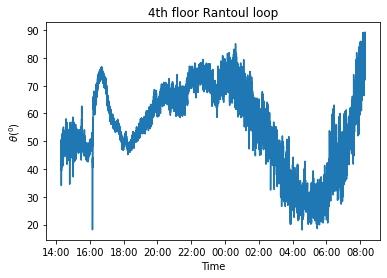

In [9]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(times,np.degrees(np.arctan(ratio_hv)))
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("4th floor Rantoul loop")
#plt.savefig('theta_time_20221202.png')

Text(0.5, 1.0, '4th floor Rantoul loop')

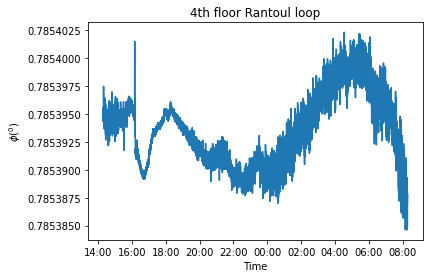

In [11]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(times,phi)
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("4th floor Rantoul loop")
#plt.savefig('phi_time_20221202.pdf')

In [10]:
theta = np.arctan(v_data/h_data)
phi = np.arctan((0.5-a_data)/(0.5-d_data))
x = np.sin(theta)*np.cos(phi)
y = np.sin(theta)*np.sin(phi)
z = np.cos(theta)

In [13]:
b = qutip.Bloch()

In [24]:
for i,j in enumerate([1,2,3]):
    print(i)

0
1
2


In [36]:
len(x)/100

540.12

In [14]:
b.add_points([x[0],y[0],z[0]],meth='m')
b.add_points([x[-1],y[-1],z[-1]],meth='m')

In [15]:
for i in range(100):
    b.add_points([x[540*i],y[540*i],z[540*i]],meth='m')

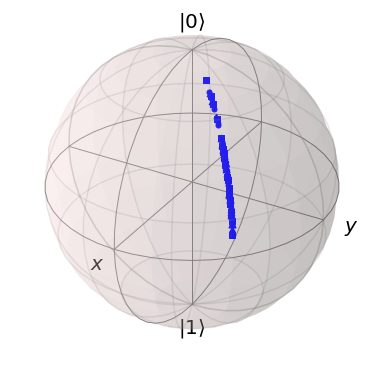

In [16]:
b.render()

Text(0.5, 1.0, '4th floor Rantoul loop')

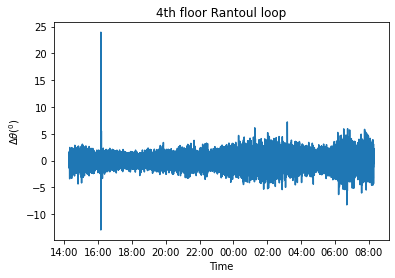

In [17]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
thetas = np.degrees(np.arctan(ratio_hv))
ax.plot(times[1:],[thetas[i+1]-thetas[i] for i in range(len(thetas)-1)])
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\Delta \theta (^0)$")
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("4th floor Rantoul loop")
#plt.savefig('theta_time_20221201.pdf')

Text(0.5, 1.0, '4th floor Rantoul loop')

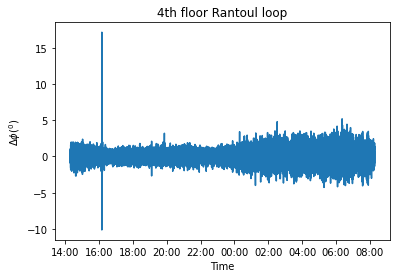

In [18]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
phis = np.degrees(np.arctan(ratio_da))
ax.plot(times[1:],[phis[i+1]-phis[i] for i in range(len(phis)-1)])
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\Delta \phi (^0)$")
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("4th floor Rantoul loop")
#plt.savefig('theta_time_20221201.pdf')